# Day 14 - Europe

Data
- ESA Global Land Cover Maps (via [this Github repo](https://github.com/littlepictures/datasets))
- Tile grid map of Europe adapted from [Maartens Lambrecht | Google News Lab](https://googletrends.github.io/eurosearch-song-contest/)

In [1]:
import os
import glob

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# set custom fonts
plt.rcParams["font.family"] = ["Inter"]
from matplotlib import font_manager
title_font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\CountrysideTwo-r9WO.ttf')

# Load data

In [3]:
project_root = os.path.abspath(os.getcwd())
all_files = glob.glob(os.path.join(project_root , "landcover_data\*.csv"))

df = []

for filename in all_files:
    #print(filename)
    data = pd.read_csv(filename, index_col=None, header=0)
    data["filename"] = filename.split("\\")[-1]
    df.append(data)

df = pd.concat(df, axis=0, ignore_index=True)
df["country"] = df["filename"].str.split("_").str[0]

# continent mapping
continents = pd.read_csv(os.path.join(project_root, "countries_continent_mapping.csv"))

# merge continents to df
df = pd.merge(df, continents[["country", "continent", "ISO"]], on="country", how="left")

# filter for Europe
df_eur = df[df["continent"]=="Europe"]

# Process data

In [4]:
forest = ['> 15% broad-leaved evergreen tree cover',
       '> 15 % broad-leaved deciduous tree cover',
        '> 15% needle-leaved evergreen tree cover',
        '> 15% needle-leaved deciduous tree cover',
       '> 40% broad-leaved deciduous tree cover',
       '15 %-40 % broad-leaved deciduous tree cover',
       '> 40% needle-leaved evergreen tree cover',
       '15 %-40 % needle-leaved evergreen tree cover',
       '> 40% needle-leaved deciduous tree cover',
       '15 % -40 % needle-leaved deciduous tree cover',
       'Mixed leaf-type (broad-leaved and needle- leaved) tree cover', 
        'Mosaic: > 50% tree and shrub cover/< 50% herbaceous cover',
        'Flooded tree cover - fresh or brackish water',
       'Flooded tree cover - saline water',
]

In [6]:
# calculate forest area
df_eur.loc[:, "forest_total"] = df_eur.loc[:, forest].sum(axis=1)

# total area
df_eur.loc[:, "total"]= df_eur.loc[:, df_eur.columns[1:38]].sum(axis=1)

# forest of total
df_eur.loc[:, "forest_of_total"] = df_eur.loc[:, "forest_total"]/df_eur.loc[:, "total"]*100

# Visualise

In [7]:
layout = [
            ["ISL","___","___","___","NOR","SWE","FIN","___"],
            ["___","___","___","___","___","___","EST","___"],
            ["IRL","GBR","___","___","DNK","___","LTU","LVA"],
            ["___","___","BEL","NLD","DEU","POL","BLR","RUS"],
            ["___","FRA","LUX","CHE","AUT","CZE","SVK","UKR"],
            ["PRT","ESP","___","ITA","SVN","HUN","ROU","MDA"],
            ["___","___","___","___","HRV","BIH","SRB","BGR"],
            ["___","___","___","___","___","MNE","MKD","___"],
            ["___","LGD","___","___","___","ALB","KOS","CYP"],
            ["___","___","___","___","___","___","GRC","___"],
            ]

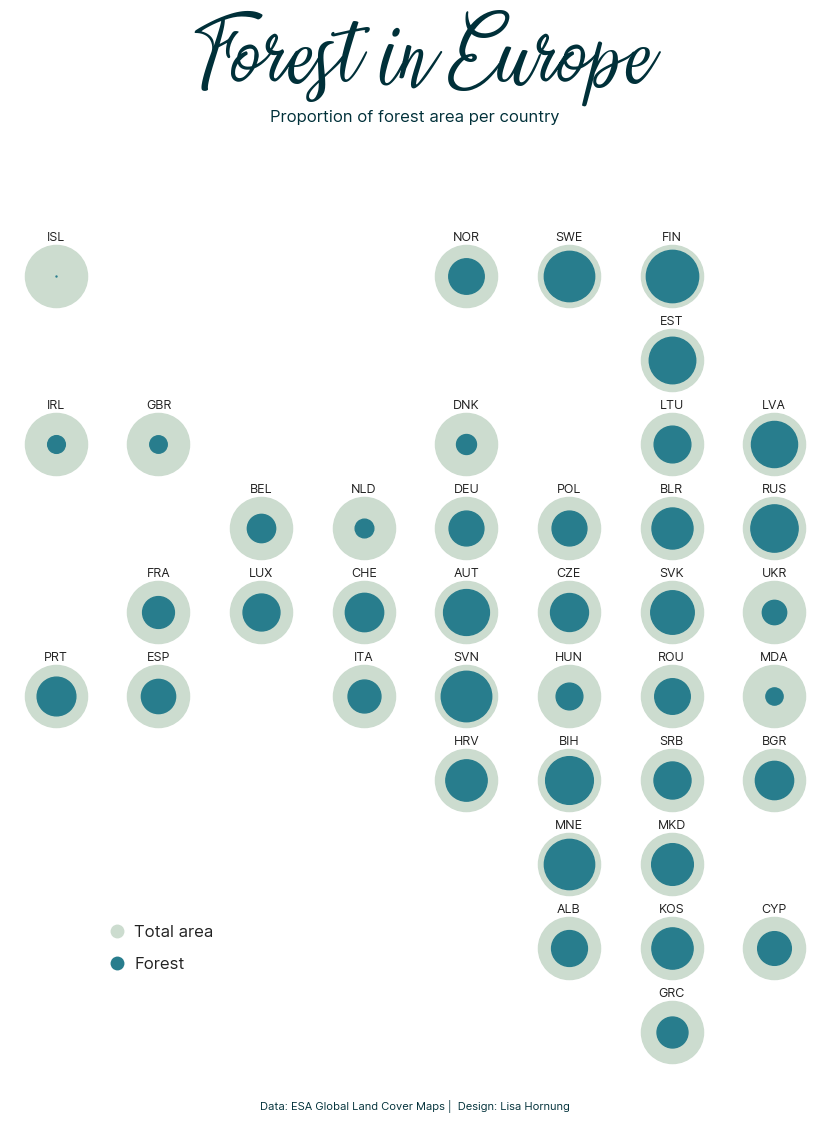

In [28]:
# filter for last year (2015)
data = df_eur[df_eur["year"]==2015]
bg_col = "#FFFFFF"
area_col = "#CCDCCF"
forest_col = "#287D8D"
label_col = "#222222"
text_col = "#003039"

# setup
fig,axs = plt.subplot_mosaic(layout, figsize=(9,10), empty_sentinel="___") 
plt.subplots_adjust(wspace=0.12, hspace=0.12, left=0.05, right=0.95, bottom=0.05)
fig.set_facecolor(bg_col)

# plot data
factor = 20
for ax in axs:
    axs[ax].axis("off")
    axs[ax].set_ylim(ymin=0, ymax=1)
    axs[ax].set_xlim(xmin=0, xmax=1)

    if ax!="LGD":
        data_filtered = data[data["ISO"]==ax]
        axs[ax].scatter(0.5,0.5, s=100*factor, marker="o", color=area_col)
        axs[ax].scatter(0.5,0.5, s=data_filtered["forest_of_total"]*factor, marker="o", color=forest_col)
        axs[ax].text(0.5,0.94, ax, fontsize=9, ha="center", va='bottom', color=label_col)

    legend_elements = [Line2D([0], [0], marker='o', markeredgecolor="None",markersize=10, color=area_col, linewidth=0, label="Total area"),
                    Line2D([0], [0], marker='o', markeredgecolor="None",markersize=10, color=forest_col, linewidth=0, label="Forest")]
    L = axs["LGD"].legend(frameon=False, handles=legend_elements, loc='center', ncol=1, handletextpad=0.2,labelspacing=1.2)
    plt.setp(L.texts,  va="baseline", size=12, color=label_col )    

# title
fig.text(0.5, 1.11,  "Forest in Europe", fontsize=45, ha='center',va="top",fontproperties=title_font, color=text_col)
fig.text(0.5, 1.01,  "Proportion of forest area per country", fontsize=12, ha='center',va="top",fontweight="regular", color=text_col)
fig.text(0.5, 0.02,  "Data: ESA Global Land Cover Maps |  Design: Lisa Hornung", fontsize=8, ha='center',va="top",fontweight="regular", color=text_col)

# save
plt.savefig("europe-forest-area-circles-3.png", facecolor=bg_col, dpi=120, bbox_inches='tight',pad_inches=1.3)

plt.show()

# Playground

In [86]:
layout = [
            ["ISL","___","___","___","NOR","SWE","FIN","___"],
            ["___","___","___","___","___","___","EST","___"],
            ["IRL","GBR","___","___","DNK","___","LTU","LVA"],
            ["___","___","BEL","NLD","DEU","POL","BLR","RUS"],
            ["___","FRA","LUX","CHE","AUT","CZE","SVK","UKR"],
            ["PRT","ESP","___","ITA","SVN","HUN","ROU","MDA"],
            ["___","___","___","___","HRV","BIH","SRB","BGR"],
            ["___","___","___","___","___","MNE","MKD","___"],
            ["___","___","___","___","___","ALB","KOS","CYP"],
            ["___","___","___","___","___","___","GRC","___"],
            ]

In [ ]:
# Color 2
bg_col = "#121212"
area_col = "#445A67"
forest_col = "#62D883"
label_col = "#B5C7D1"
text_col = "#D3DFE7"

In [ ]:
# Color 3
bg_col = "#F2EEEC"
area_col = "#E5C39E"
forest_col = "#4B7886"
label_col = "#222222"
text_col = "#19424B"

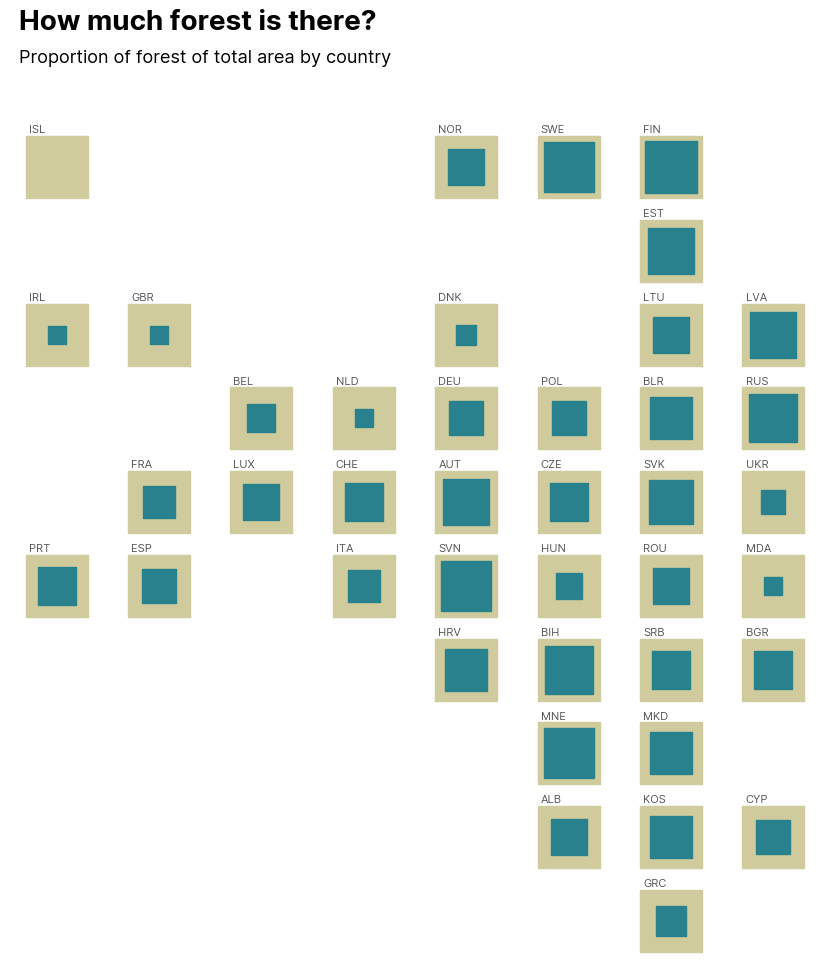

In [87]:
# filter for last year (2015)
data = df_eur[df_eur["year"]==2015]

#square version 
fig,axs = plt.subplot_mosaic(layout, figsize=(9,10), empty_sentinel="___") 
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0.05, right=0.95, bottom=0.05)
factor = 20
for ax in axs:
    data_filtered = data[data["ISO"]==ax]
    axs[ax].scatter(0.5,0.5, s=100*factor, marker="s", color="#CFCB9C")
    axs[ax].scatter(0.5,0.5, s=data_filtered["forest_of_total"]*factor, marker="s", color="#28818C")

    axs[ax].axis("off")
    axs[ax].set_ylim(ymin=0, ymax=1)
    axs[ax].set_xlim(xmin=0, xmax=1)
    axs[ax].text(0.2,0.93, ax, fontsize=8, ha="left", va='bottom', color="#555555")
        

# title
fig.text(0.06, 1,  "How much forest is there?", fontsize=20, ha='left',va="top",fontweight="bold")
fig.text(0.06, 0.96,  "Proportion of forest of total area by country", fontsize=13, ha='left',va="top",fontweight="regular")

plt.show()

In [8]:
# Build grid
layout = [
            ["ISL","___","___","___","NOR","SWE","FIN","___"],
            ["___","___","___","___","___","___","EST","___"],
            ["IRL","GBR","___","___","DNK","___","LTU","LVA"],
            ["___","___","BEL","NLD","DEU","POL","BLR","RUS"],
            ["___","FRA","LUX","CHE","AUT","CZE","SVK","UKR"],
            ["PRT","ESP","___","ITA","SVN","HUN","ROU","MDA"],
            ["___","___","SMR","___","HRV","BIH","SRB","BGR"],
            ["___","MLT","___","___","___","MNE","MKD","___"],
            ["___","___","___","___","___","ALB","KOS","CYP"],
            ["___","___","___","___","___","___","GRC","___"],
            ]